# KNN para regressão

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings("ignore")
import knn as knn
import common as com

from sklearn import datasets

#x, y = datasets.load_boston(return_X_y=True)
#x, y = datasets.load_diabetes(return_X_y=True)

#data_table = pd.read_csv('data/ex1data1.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values
 
#np.random.seed(12345)
#x = np.linspace(-10, 10, 100)[:,None]
#y = x**3 
#y += np.random.normal(scale=0.15 * np.std(y), size=y.shape)    
 
data_table = pd.read_csv('data/sinc.txt', header=None)
x = data_table.drop(data_table.columns[-1], axis=1).values
y = data_table.iloc[:,data_table.columns[-1]].values    
    
if x.shape[1] == 1:    
    fig = plt.figure(figsize=com.figsize)
    plt.plot(x, y, 'ob', markersize=com.markersize)
    #plt.savefig('figs/blobs.png', dpi=com.dpi)
    plt.show()
    xlim = fig.gca().get_xlim() 
    ylim = fig.gca().get_ylim() 

<Figure size 800x600 with 1 Axes>

In [2]:
np.random.seed(12345)

number_train = int(np.ceil(0.5*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 51
Número de padrões de teste: 49


## Normalização dos dados

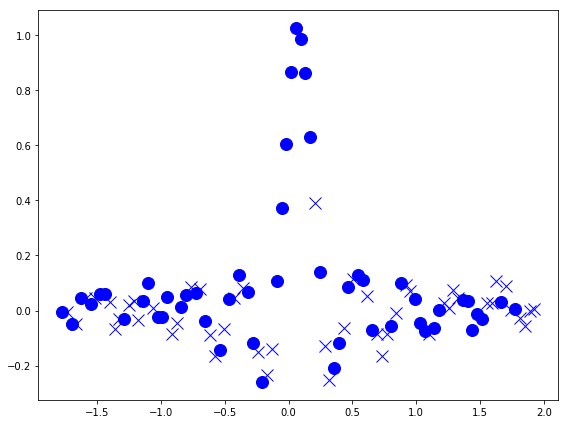

In [3]:
normalize_data = True

if normalize_data:
    x_mean = np.mean(x_train, axis=0)        
    x_train -= x_mean
    x_std = np.std(x_train, axis=0)
    x_train /= x_std
    
    x_test -= x_mean
    x_test /= x_std
    
    if x_train.shape[1] == 1:
        fig = plt.figure(figsize=com.figsize)
        plt.plot(x_train, y_train, 'ob', markersize=com.markersize)
        plt.plot(x_test, y_test, 'xb', markersize=com.markersize)
        plt.show()
        xlim = fig.gca().get_xlim() 
        ylim = fig.gca().get_ylim() 

## Solução via KNN

MSE no teste para k = 2 e weights = 'distance': 4.68e-03


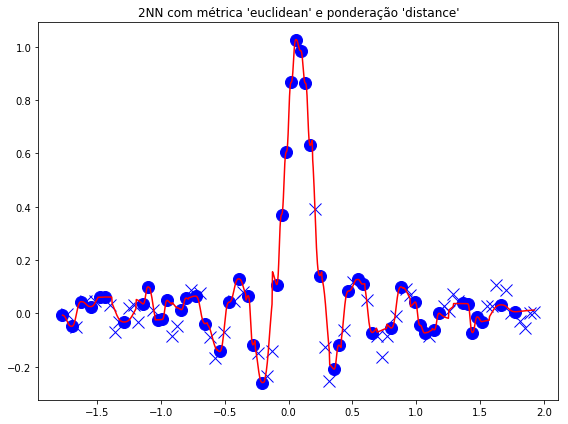

In [4]:
k = 2
weights = 'distance'
distance_metric = 'euclidean' # 'euclidean' 'manhattan' 'mahalanobis'

pred = knn.predict_regression(x_train, y_train, x_test, k=k, weights=weights, distance_metric=distance_metric)
mse_test = np.mean((y_test - pred)**2)

if x_train.shape[1] == 1:
    fig = plt.figure(figsize=com.figsize)
    plt.plot(x_train, y_train, 'ob', markersize=com.markersize)
    plt.plot(x_test, y_test, 'xb', markersize=com.markersize)
    x_plot = np.linspace(np.min(np.vstack((x_train, x_test))), np.max(np.vstack((x_train, x_test))), 1000)[:,None]
    plt.plot(x_plot, knn.predict_regression(x_train, y_train, x_plot, k=k, weights=weights, distance_metric=distance_metric), '-r')
    plt.title("%dNN com métrica '%s' e ponderação '%s'" % (k, distance_metric, weights))
    #plt.savefig('figs/sinc_2NN_uniform.png', dpi=com.dpi)
    #plt.savefig('figs/sinc_2NN_distance.png', dpi=com.dpi)
    
print("MSE no teste para k = %d e weights = '%s': %.2e" % (k, weights, mse_test))

## Grid search para otimização do K

In [5]:
number_validation = int(np.ceil(0.3*(x_train.shape[0])))
number_train = x_train.shape[0] - number_validation

random_index = np.random.permutation(x_train.shape[0])
train_index = random_index[:number_train+1]
validation_index = random_index[number_train+1:number_train+number_validation+1]

x_train, x_validation = x_train[train_index], x_train[validation_index]
y_train, y_validation = y_train[train_index], y_train[validation_index]

print("Conjunto de treinamento: %d amostras" % y_train.shape[0])
print("Conjunto de validação: %d amostras" % y_validation.shape[0])

Conjunto de treinamento: 36 amostras
Conjunto de validação: 15 amostras


K = 2, distance_metric = 'euclidean', weights = 'uniform' -- MSE na validação: 3.70e-02
K = 2, distance_metric = 'euclidean', weights = 'distance' -- MSE na validação: 3.28e-02
K = 3, distance_metric = 'euclidean', weights = 'uniform' -- MSE na validação: 5.18e-02
K = 3, distance_metric = 'euclidean', weights = 'distance' -- MSE na validação: 3.80e-02
K = 4, distance_metric = 'euclidean', weights = 'uniform' -- MSE na validação: 6.99e-02
K = 4, distance_metric = 'euclidean', weights = 'distance' -- MSE na validação: 4.06e-02
K = 5, distance_metric = 'euclidean', weights = 'uniform' -- MSE na validação: 1.02e-01
K = 5, distance_metric = 'euclidean', weights = 'distance' -- MSE na validação: 4.63e-02
K = 6, distance_metric = 'euclidean', weights = 'uniform' -- MSE na validação: 1.28e-01
K = 6, distance_metric = 'euclidean', weights = 'distance' -- MSE na validação: 5.03e-02
K = 7, distance_metric = 'euclidean', weights = 'uniform' -- MSE na validação: 1.40e-01
K = 7, distance_metric = 'e

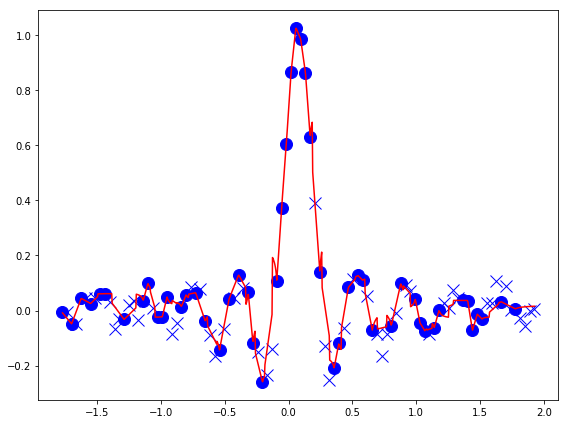

MSE no teste: 5.10e-03


In [6]:
grid_search = np.meshgrid(np.arange(2, 31), # k
                          ['euclidean', 'manhattan', 'mahalanobis'], # distance metric
                          ['uniform', 'distance']) # weights
validation_list = []
validation_list_index = []

for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        for z in range(grid_search[2].shape[2]):
            k = grid_search[0][i,j,z]
            distance_metric = grid_search[1][i,j,z]   
            weights = grid_search[2][i,j,z]   
            pred = knn.predict_regression(x_train, y_train, x_validation, k=k, weights=weights, distance_metric=distance_metric)
            mse_validation = np.mean((y_validation - pred)**2)
            validation_list.append(mse_validation)
            validation_list_index.append((i,j,z))
            print("K = %d, distance_metric = '%s', weights = '%s' -- MSE na validação: %.2e" % (k, distance_metric, weights, validation_list[-1]))
    
best_i, best_j, best_z = validation_list_index[np.argmin(validation_list)]   
best_k = grid_search[0][best_i, best_j, best_z]
best_distance_metric = grid_search[1][best_i, best_j, best_z]
best_weights = grid_search[2][best_i, best_j, best_z]
print("Melhor K: %d" % best_k)
print("Melhor métrica de distância: '%s'" % best_distance_metric)
print("Melhor weights: '%s'" % best_weights)
print("MSE na validação: %.2e" % (validation_list[best_i]))
    
in_train_validation = np.vstack((x_train, x_validation))
out_train_validation = np.concatenate((y_train, y_validation))    

pred = knn.predict_regression(in_train_validation, out_train_validation,
                              x_test, k=best_k, weights=best_weights, distance_metric=best_distance_metric)
mse_test = np.mean((y_test - pred)**2)

if x_train.shape[1] == 1:
    fig = plt.figure(figsize=com.figsize)
    plt.plot(in_train_validation, out_train_validation, 'ob', markersize=com.markersize)
    plt.plot(x_test, y_test, 'xb', markersize=com.markersize)
    x_plot = np.linspace(np.min(np.vstack((in_train_validation, x_test))), np.max(np.vstack((in_train_validation, x_test))), 1000)[:,None]
    plt.plot(x_plot, knn.predict_regression(in_train_validation, out_train_validation,
                                            x_plot, k=best_k, weights=best_weights, distance_metric=best_distance_metric), '-r')
    plt.show()

    #plt.savefig('figs/blobs_GNB.png', dpi=com.dpi)
    
print("MSE no teste: %.2e" % (mse_test))